In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyEMD import EMD
from google.colab import drive
import matplotlib.dates as mdates
drive.mount('/content/drive')
excel_path = "/content/drive/MyDrive/IBM.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


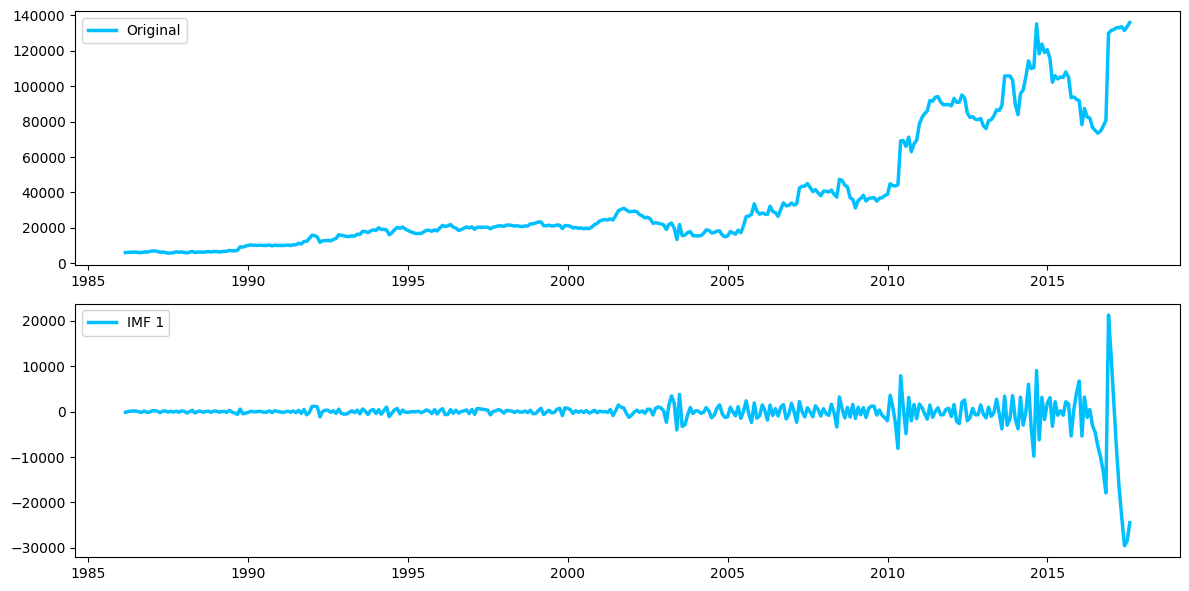

In [34]:
# Load mvel1 from a local Excel file (in Colab folder)
def load_mvel1_from_excel(path):
    df = pd.read_excel(path)

    # Parse the 'DATE' column
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.set_index('DATE')

    # Drop missing values
    mvel1 = df['mvel1'].dropna()

    return mvel1

# Perform EMD and return only IMF1
def get_imf1(series):
    emd = EMD()
    IMFs = emd(series.values)
    return IMFs[0]  # Only IMF1

import matplotlib.dates as mdates

def plot_data_and_imf1(series, imf1):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), facecolor='none')  # transparent figure

    # Plot mvel1
    axs[0].plot(series.index, series, label = 'Original', color='deepskyblue', linewidth=2.5)
    #axs[0].set_title('Original')
    axs[0].legend()
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[0].xaxis.set_major_locator(mdates.YearLocator(base=5))
    axs[0].set_facecolor('none')  # transparent axes background

    # Plot IMF1
    axs[1].plot(series.index, imf1, label = 'IMF 1', color='deepskyblue', linewidth=2.5)
    #axs[1].set_title('IMF 1')
    axs[1].legend()
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[1].xaxis.set_major_locator(mdates.YearLocator(base=5))
    axs[1].set_facecolor('none')  # transparent axes background

    plt.tight_layout()
    plt.show()

# Main
if __name__ == "__main__":
    excel_path = "/content/drive/MyDrive/IBM.xlsx"  # Replace with your actual file path
    mvel1_series = load_mvel1_from_excel(excel_path)
    imf1 = get_imf1(mvel1_series)
    plot_data_and_imf1(mvel1_series, imf1)